In [ ]:
# !pip install selenium

     |████████████████████████████████| 911kB 5.8MB/s 


In [ ]:
from selenium import webdriver as wd
from bs4 import BeautifulSoup as bs

from selenium.webdriver.common.by import By

# 명시적 대기를 위해
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from IPython.display import Image

import numpy as np
import pandas as pd
import platform
import time
import sys
import re

In [ ]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = '/content/drive/MyDrive/Colab Notebooks/세종시/data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
import folium

m = folium.Map(
    location=[36.55977251773024, 127.25624033617439],
    zoom_start=10
)

import json
with open('/content/drive/MyDrive/Colab Notebooks/세종시/data/30.세종시_법정경계(시군구).geojson', mode='rt', encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()

folium.GeoJson(
    geo,
    name='sejong_municipalities'
).add_to(m)

In [ ]:
# 30.세종시_법정경계(시군구).geojson
# 31.세종시_법정경계(읍면동).geojson
# 32.세종시_행정경계(읍면동).geojson
# 33.세종시_지적도.geojson
geo = json.load(open('', encoding = 'utf-8'))

In [ ]:
## 지도 표기시 참고
# sbucksData = pd.DataFrame({'gu':population.index, 'counts':population['스타벅스']})

# map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

# map.choropleth(geo_str,
#               data=sbucksData,
#               columns=['gu', 'counts'],
#               fill_color='PuRd', #PuRd, YlGnBu
#               key_on='feature.id')

# map

# 실거래가 자료 3~ 10번 자료
- 3.세종시_아파트(매매)_실거래가.csv
- 4.세종시_연립다세대(매매)_실거래가.csv
- 5.세종시_단독다가구(매매)_실거래가.csv
- 6.세종시_오피스텔(매매)_실거래가.csv
- 7.세종시_아파트(전월세)_실거래가.csv
- 8.세종시_연립다세대(전월세)_실거래가.csv
- 9.세종시_단독다가구(전월세)_실거래가.csv
- 10.세종시_오피스텔(전월세)_실거래가.csv
- 13.세종시_분양권_실거래가.csv

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/3.세종시_아파트(매매)_실거래가.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/4.세종시_연립다세대(매매)_실거래가.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/5.세종시_단독다가구(매매)_실거래가.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/6.세종시_오피스텔(매매)_실거래가.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/7.세종시_아파트(전월세)_실거래가.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/8.세종시_연립다세대(전월세)_실거래가.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/9.세종시_단독다가구(전월세)_실거래가.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/10.세종시_오피스텔(전월세)_실거래가.csv')
df9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/13.세종시_분양권_실거래가.csv')

In [ ]:
df2['거래금액(만원)'] = df2['거래금액(만원)'].str.replace(',', '').astype('int64')

In [ ]:
df2 = df2[['계약년월','전용면적(㎡)','거래금액(만원)']]
df2

,계약년월,전용면적(㎡),거래금액(만원)
0,201701,62.0800,4700
1,201701,64.2300,6500
2,201701,53.9650,4300
3,201701,48.5300,4000
4,201702,67.9000,12800
...,...,...,...
616,202012,21.6349,9500
617,202012,21.6349,9500
618,202012,54.0900,5500
619,202012,64.8200,13400


In [ ]:
index = df2.index
columns = df2.columns

Index(['거래금액(만원)', '전용면적(㎡)', '월별평균거래가'], dtype='object')

In [ ]:
df2 = pd.pivot_table(df2, index = '계약년월',aggfunc = 'sum')
df2

,거래금액(만원),전용면적(㎡)
계약년월,,
201701,19500,228.8050
201702,12800,67.9000
201703,33900,379.3400
201704,46650,375.2900
201705,119500,901.4800
201706,358500,1565.2843
201707,172800,1114.1955
201708,46700,333.5250
201709,170050,1166.1150


In [ ]:
df2['월별평균거래가'] = df2['거래금액(만원)'] / df2['전용면적(㎡)']

In [ ]:
df2

In [ ]:
df2.reindex(index, columns)

,거래금액(만원),전용면적(㎡),월별평균거래가
계약년월,,,
201701,19500,228.8050,85.225410
201702,12800,67.9000,188.512518
201703,33900,379.3400,89.365740
201704,46650,375.2900,124.303872
201705,119500,901.4800,132.559791
201706,358500,1565.2843,229.031876
201707,172800,1114.1955,155.089479
201708,46700,333.5250,140.019489
201709,170050,1166.1150,145.826098


In [ ]:
from matplotlib import pyplot as plt

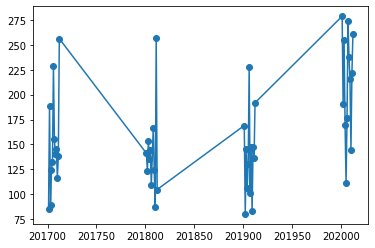

In [ ]:
x_values = df2.index
y_values = df2['월별평균거래가']
plt.plot(x_values, y_values,marker='o')